# Balanced allocations

In [35]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from lib import one_choice, two_choice, beta_choice,\
                partial_information_k1, partial_information_k2

SAVE_FIGS=False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Gap for different strategies considering $d$-batches

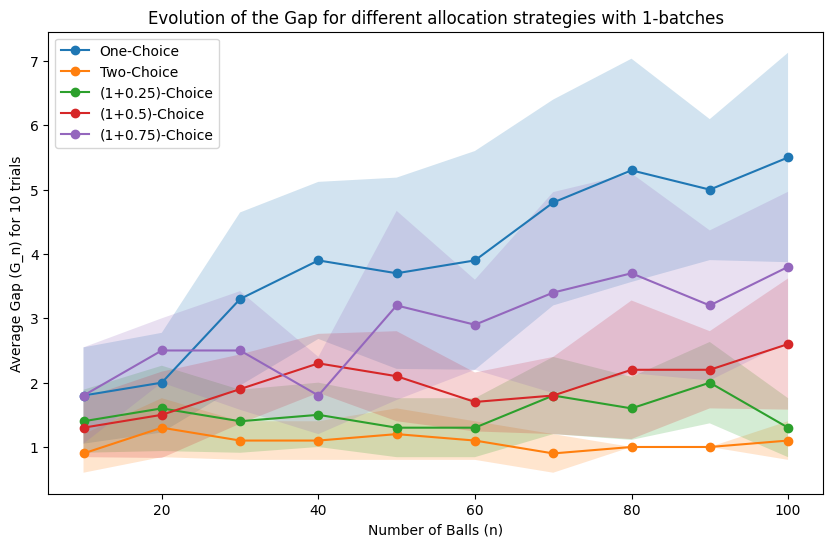

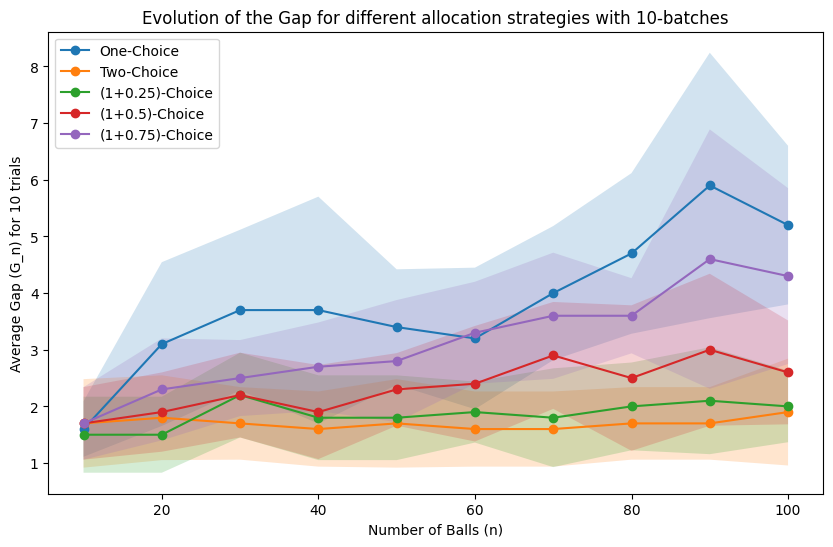

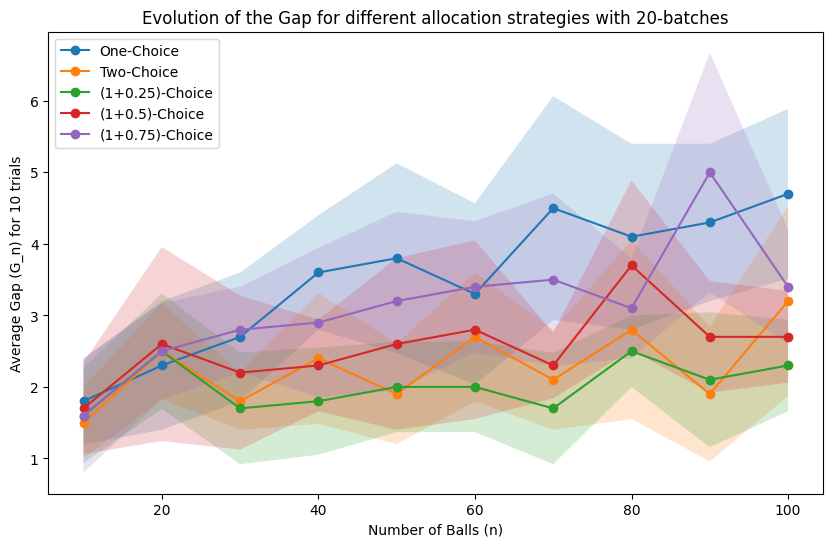

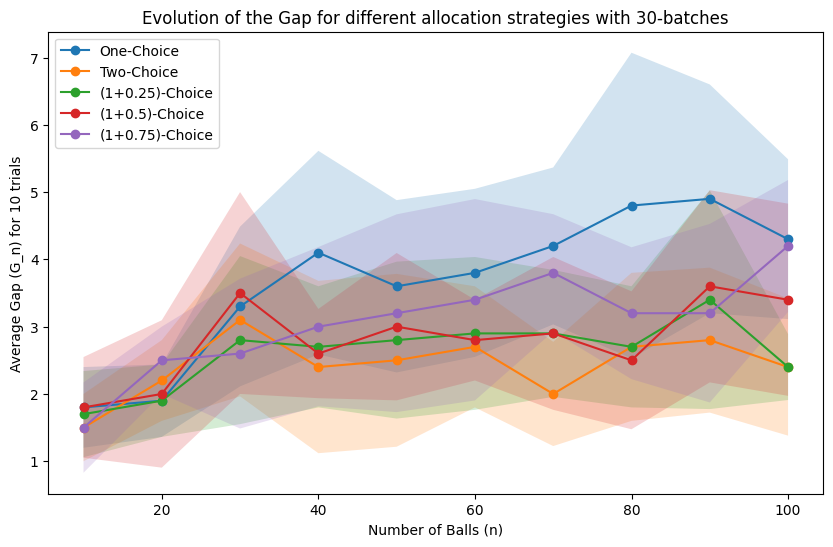

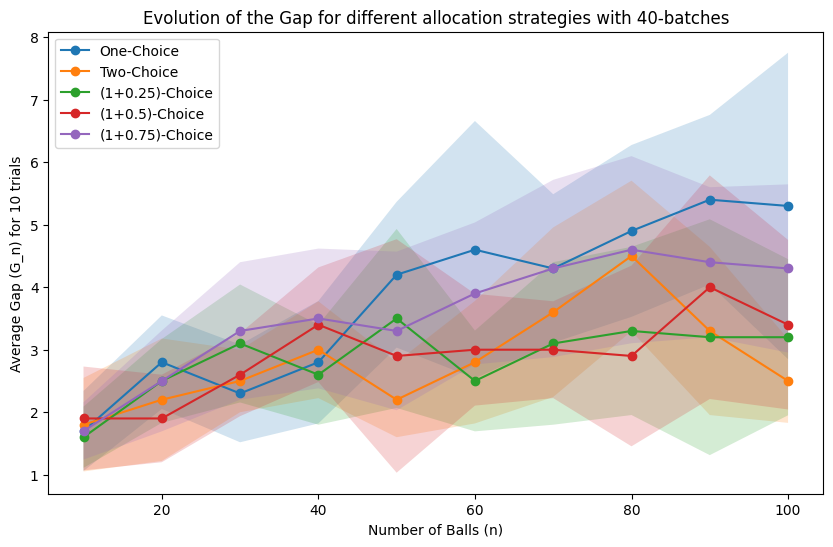

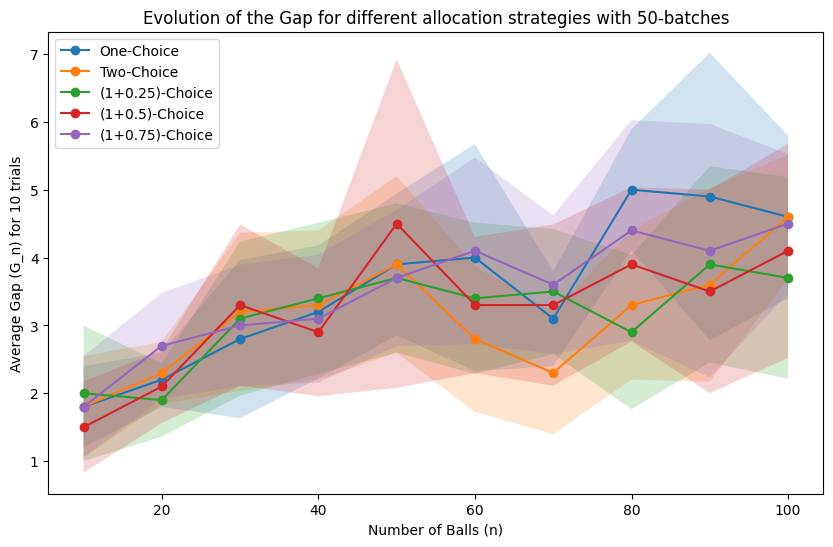

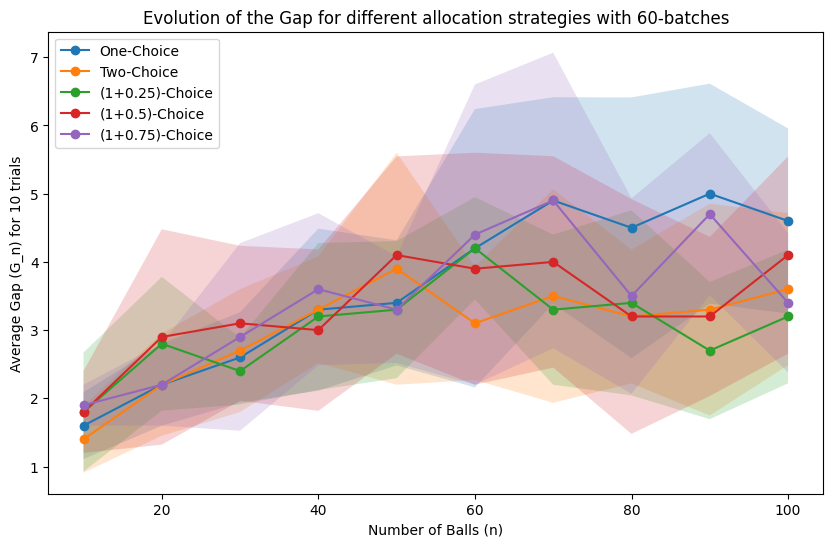

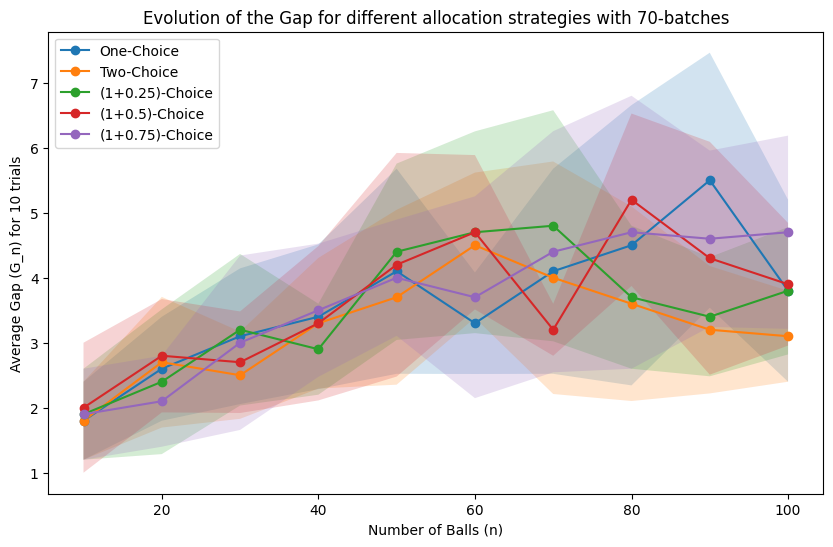

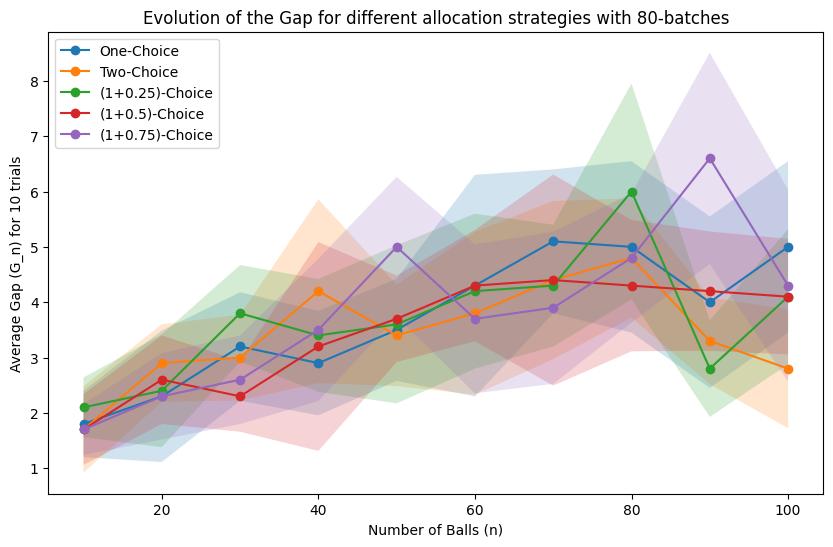

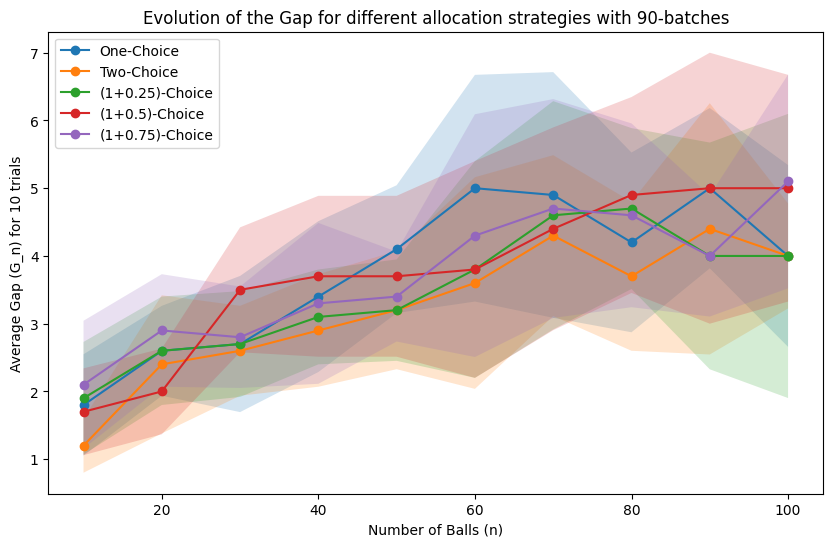

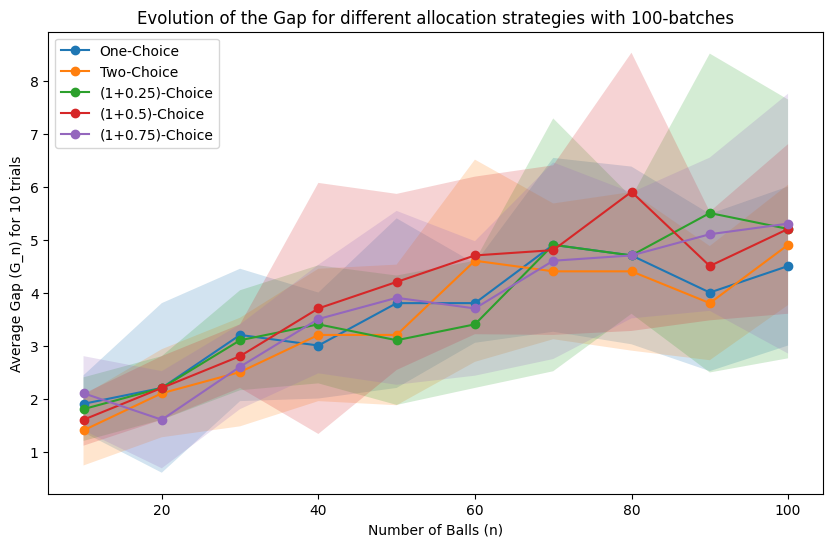

In [43]:
# Parameters
m = 10  # Number of bins
n_values = range(m, m**2 + 1, m)  # Light-load and heavy-load scenarios
T = 10  # Number of trials for averaging
beta_values = [0.25, 0.5, 0.75]  # Different beta values for (1 + beta)-choice
d_batches = [1] + list(range(m, m**2 + 1, m))

# Set random seed for reproducibility
np.random.seed(42)

# Run experiments and plot results
for d in d_batches:
    gaps = { "One-Choice": [], "Two-Choice": [] }
    stddevs = { "One-Choice": [], "Two-Choice": [] }
    for beta in beta_values:
        gaps[f"(1+{beta})-Choice"] = []
        stddevs[f"(1+{beta})-Choice"] = []

    for n in n_values:  # Iterate over increasing number of balls
        gaps_n = { key: [] for key in gaps.keys() }
        
        for _ in range(T):
            # Initialize bins for each strategy
            bins_one_choice = np.zeros(m, dtype=int)
            bins_two_choice = np.zeros(m, dtype=int)
            bins_beta = { beta: np.zeros(m, dtype=int) for beta in beta_values }

            num_batches = (n+d-1)//d
            
            for batch in range(num_batches):
                remaining_balls = n - batch * d
                batch_sz = d if d <= remaining_balls else remaining_balls
                one_choice(bins_one_choice, m, batch_sz)
                two_choice(bins_two_choice, m, batch_sz)
                for beta in beta_values:
                    beta_choice(bins_beta[beta], beta, m, batch_sz)
            
            # Compute gaps for each strategy
            gaps_n["One-Choice"].append(compute_gap(bins_one_choice, n, m))
            gaps_n["Two-Choice"].append(compute_gap(bins_two_choice, n, m))
            for beta in beta_values:
                gaps_n[f"(1+{beta})-Choice"].append(compute_gap(bins_beta[beta], n, m))
        
        # Store the average gap across trials
        for key in gaps.keys():
            gaps[key].append(np.mean(gaps_n[key]))
            stddevs[key].append(np.std(gaps_n[key]))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for key, values in gaps.items():
        # Mean and standard deviation for each value of n
        means = values
        stds = stddevs[key]
        
        # Plot mean with shaded area for standard deviation
        plt.plot(n_values, means, marker='o', label=key)
        plt.fill_between(n_values, np.array(means) - np.array(stds), np.array(means) + np.array(stds), alpha=0.2)
    
    plt.xlabel("Number of Balls (n)")
    plt.ylabel(f"Average Gap (G_n) for {T} trials")
    plt.title(f"Evolution of the Gap for different allocation strategies with {d}-batches")
    plt.legend()
    if SAVE_FIGS:
        plt.savefig(f"different_allocation-{d}_batch.pdf")
    plt.show()

## Gap for partial information strategies considering $d$-batches

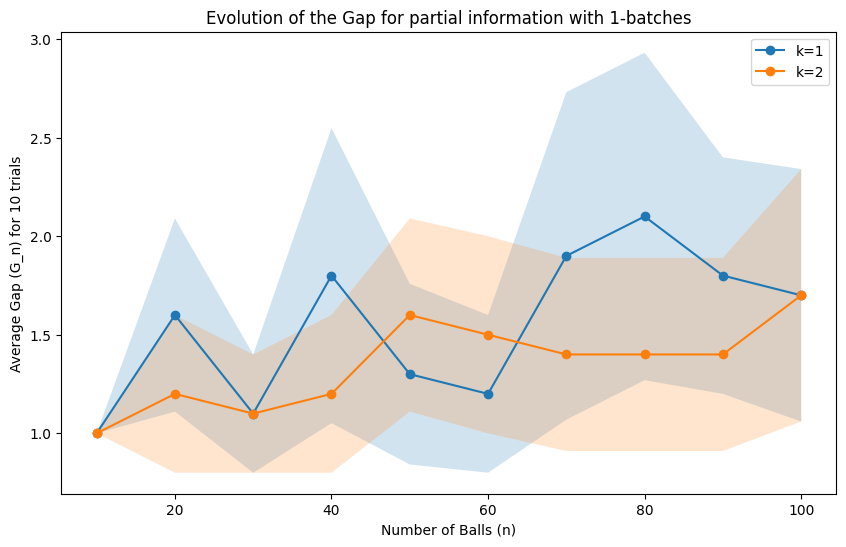

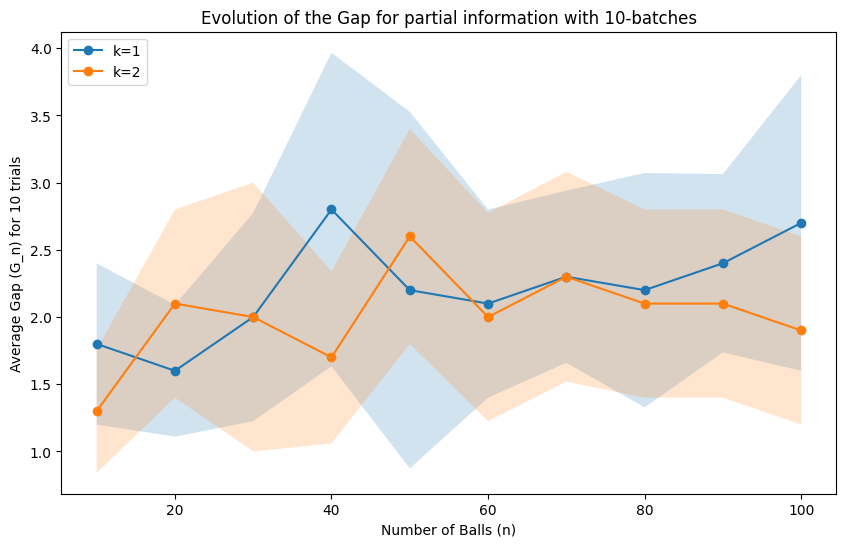

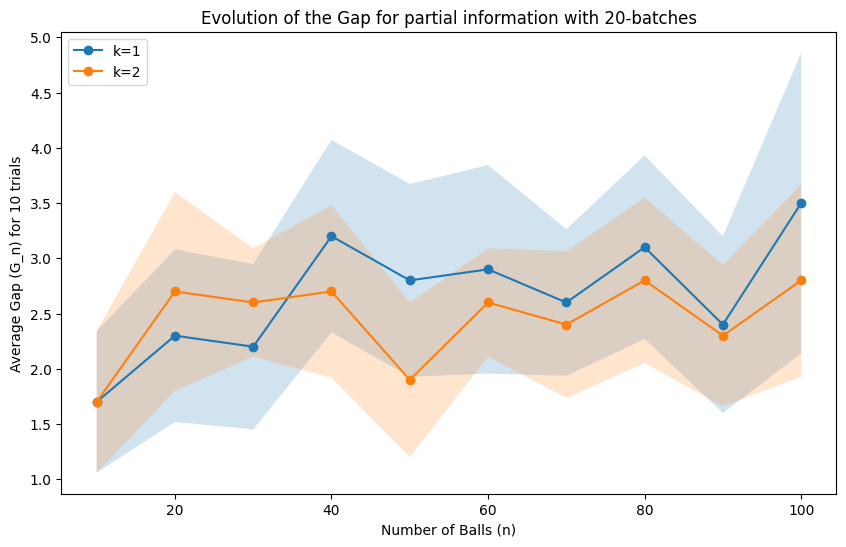

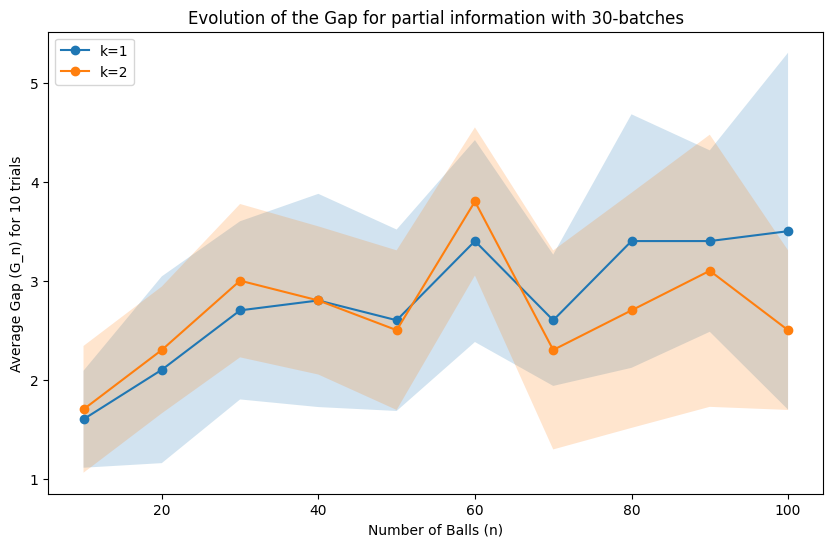

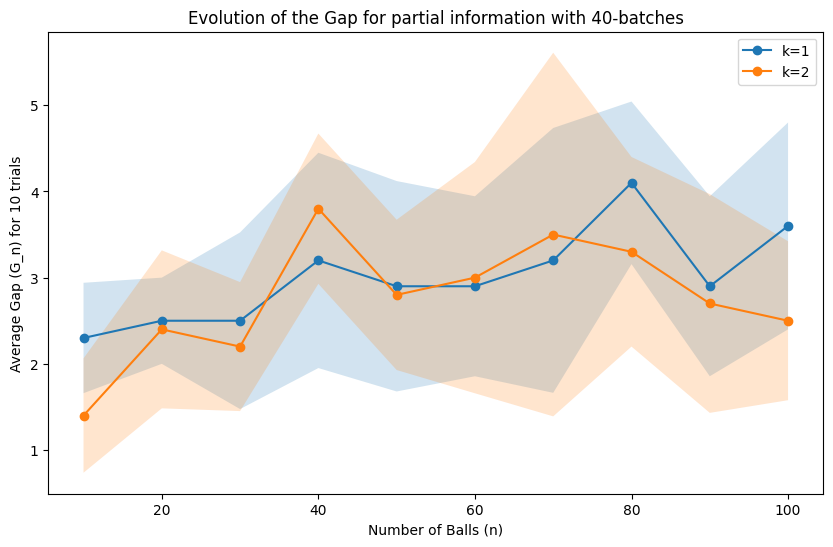

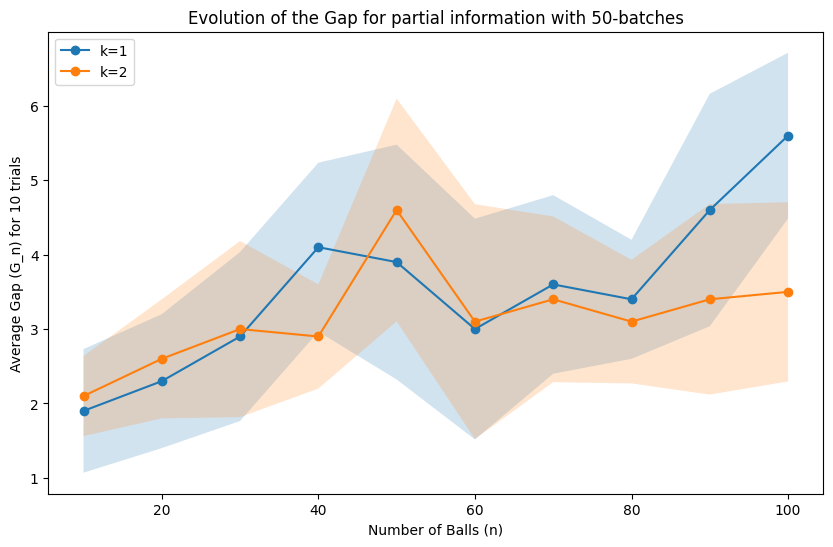

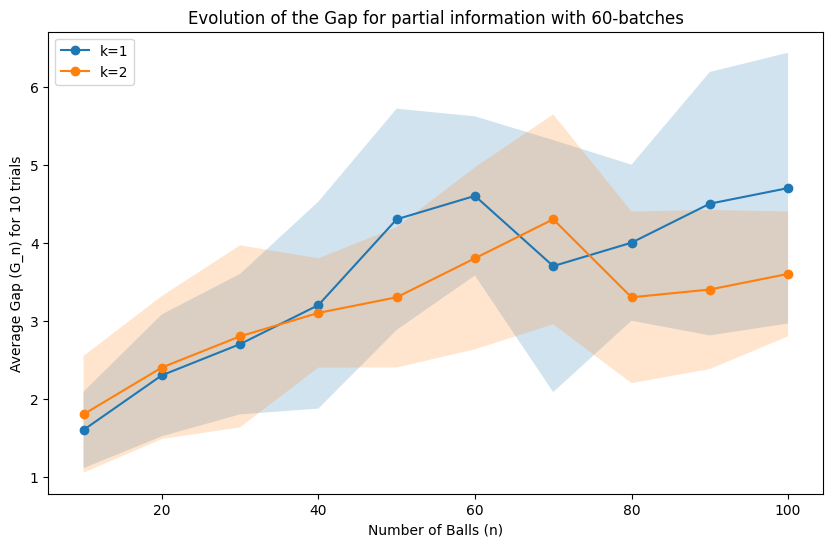

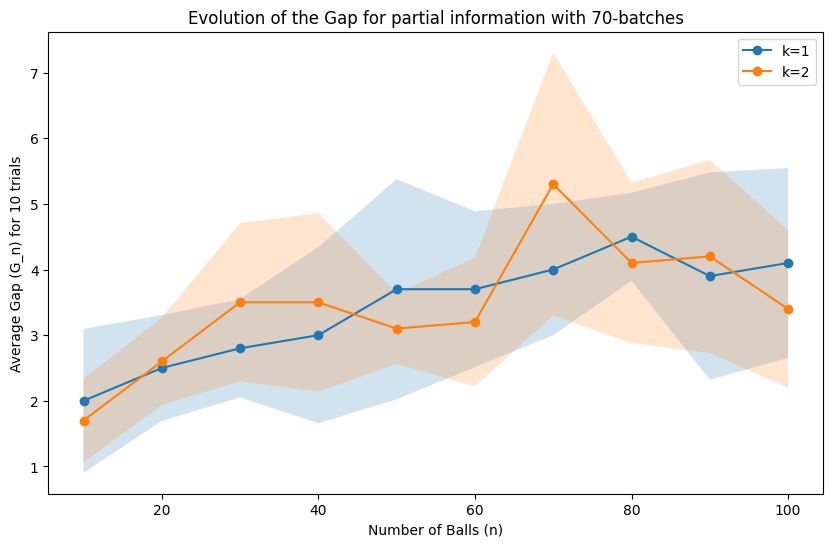

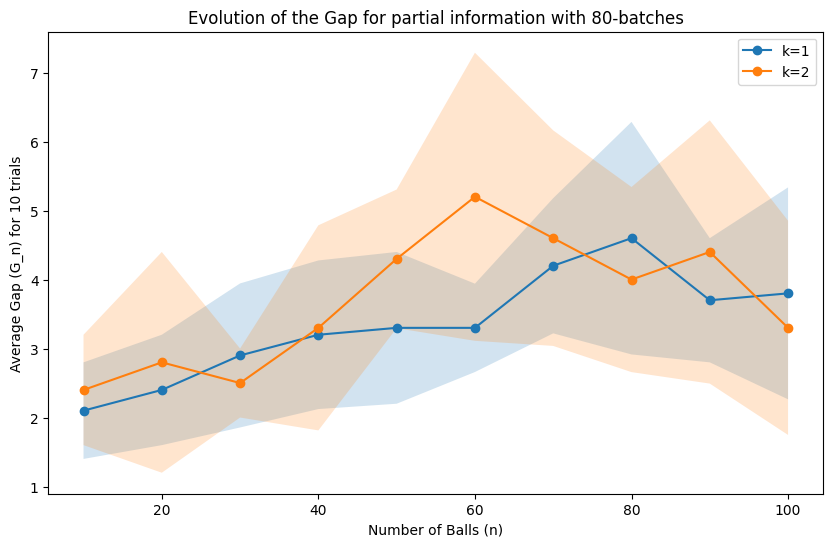

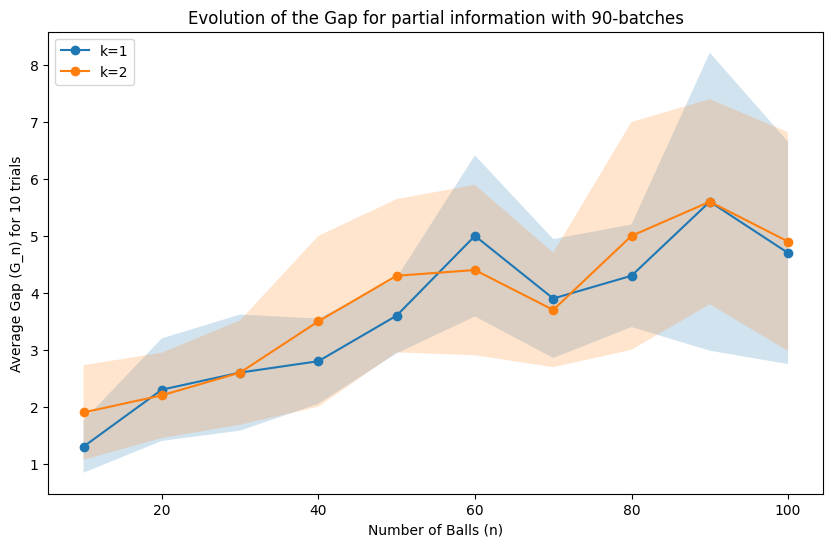

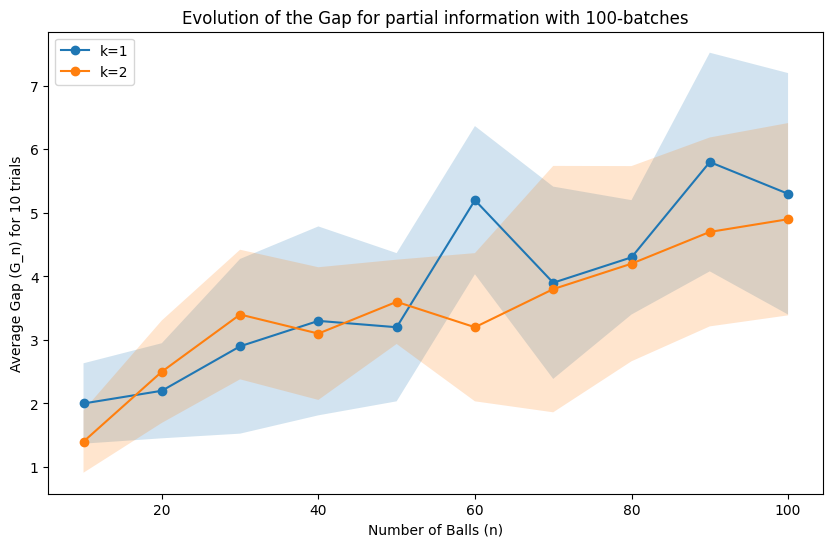

In [50]:
# Parameters
m = 10  # Number of bins
n_values = range(m, m**2 + 1, m)  # Light-load and heavy-load scenarios
T = 10  # Number of trials for averaging
beta_values = [0.25, 0.5, 0.75]  # Different beta values for (1 + beta)-choice
d_batches = [1] + list(range(m, m**2 + 1, m))

# Set random seed for reproducibility
np.random.seed(42)

# Run experiments and plot results

for d in d_batches:
    # Run experiments and plot results for k=1 and k=2
    gaps_k1 = []
    gaps_k2 = []
    stddevs_k1 = []
    stddevs_k2 = []

    for n in n_values:  # Iterate over increasing number of balls
        gaps_n_k1 = []
        gaps_n_k2 = []
        
        for _ in range(T):
            bins_k1 = np.zeros(m, dtype=int)
            bins_k2 = np.zeros(m, dtype=int)
            
            num_batches = (n+d-1)//d
            
            for batch in range(num_batches):
                remaining_balls = n - batch * d
                batch_sz = d if d <= remaining_balls else remaining_balls
                partial_information_k1(bins_k1, m, batch_sz)
                partial_information_k2(bins_k2, m, batch_sz)
            
            # Compute gaps for each strategy
            gaps_n_k1.append(compute_gap(bins_k1, n, m))
            gaps_n_k2.append(compute_gap(bins_k2, n, m))
        
        # Store the mean and standard deviation across trials
        gaps_k1.append(np.mean(gaps_n_k1))
        stddevs_k1.append(np.std(gaps_n_k1))
        gaps_k2.append(np.mean(gaps_n_k2))
        stddevs_k2.append(np.std(gaps_n_k2))
    
    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(n_values, gaps_k1, marker='o', label="k=1")
    plt.fill_between(n_values, np.array(gaps_k1) - np.array(stddevs_k1), 
                     np.array(gaps_k1) + np.array(stddevs_k1), alpha=0.2)
    
    plt.plot(n_values, gaps_k2, marker='o', label="k=2")
    plt.fill_between(n_values, np.array(gaps_k2) - np.array(stddevs_k2), 
                     np.array(gaps_k2) + np.array(stddevs_k2), alpha=0.2)
    
    plt.xlabel("Number of Balls (n)")
    plt.ylabel(f"Average Gap (G_n) for {T} trials")
    plt.title(f"Evolution of the Gap for partial information with {d}-batches")
    plt.legend()
    if SAVE_FIGS:
        plt.savefig(f"partial_information-{d}_batch.pdf")
    plt.show()